In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, accuracy_score, plot_confusion_matrix

import missingno as msno
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("categorical_data.csv")
epochy=100
df

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


Text(0.5, 1.0, 'Tweets distribution by cyberbullying types')

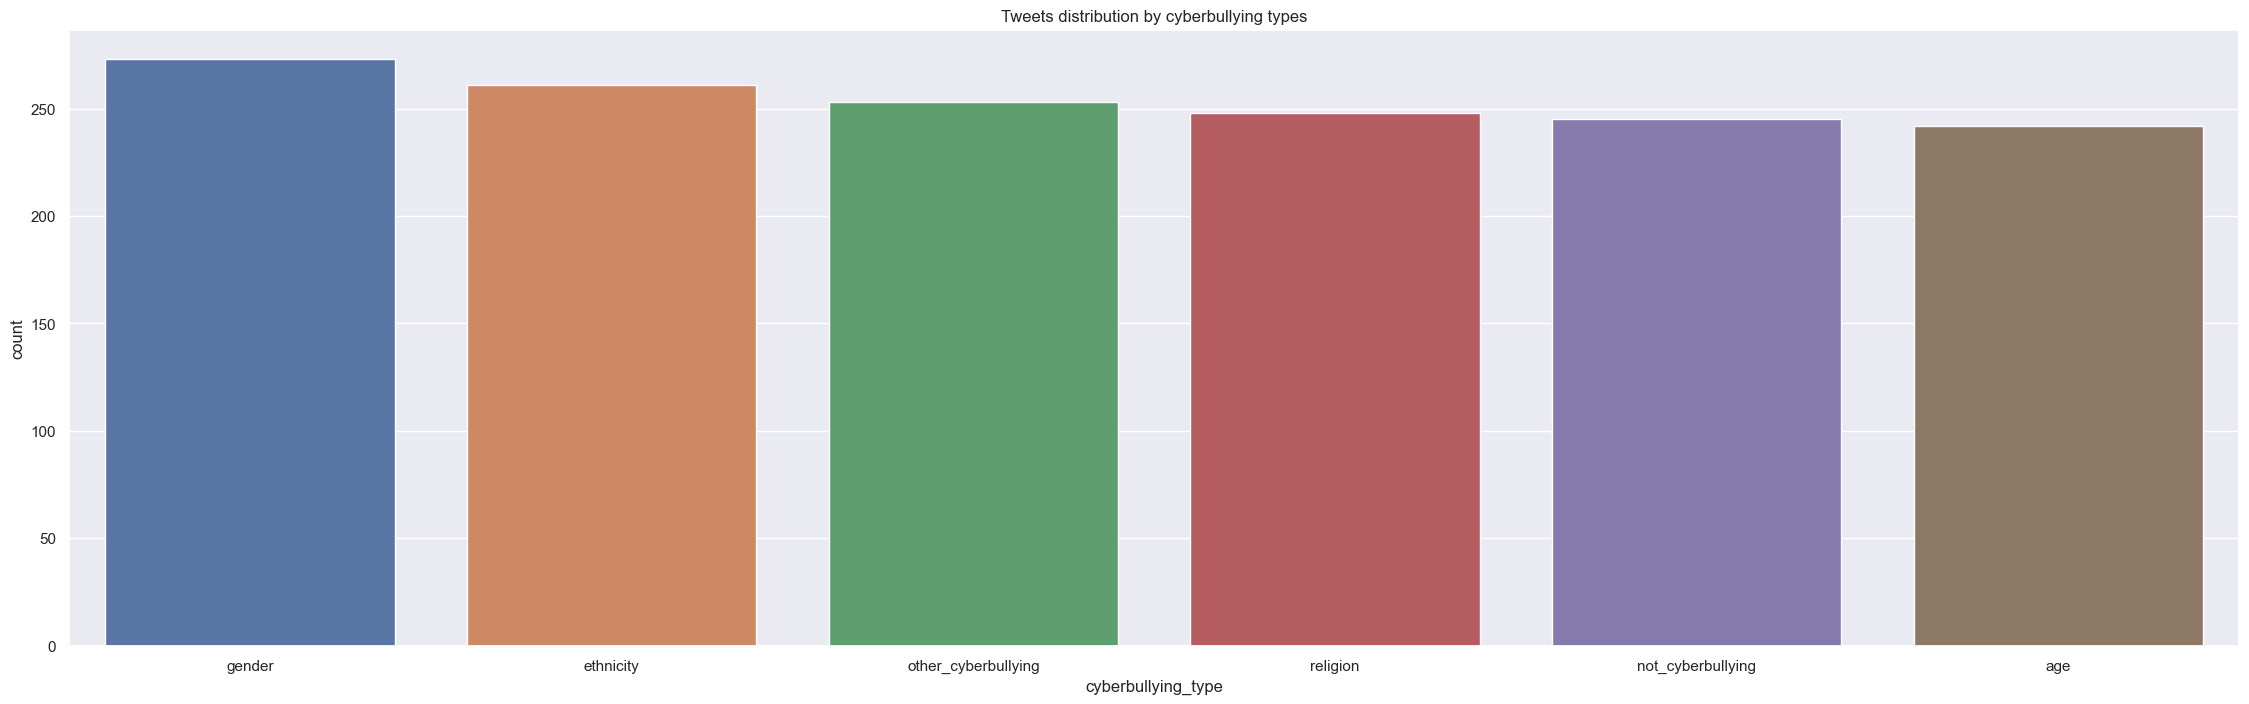

In [3]:
classes=list(df["cyberbullying_type"].unique())
df_list=[]

flux=700-800+800
for i in range(len(classes)):
    sub_df=df[df["cyberbullying_type"]==classes[i]]
    #drop first 7000 rows of sub_df
    if (classes[i]=="other_cyberbullying"):
        sub_df=sub_df.drop(sub_df.index[:6870+flux])
    elif (classes[i]=="religion"):
        sub_df=sub_df.drop(sub_df.index[:7050+flux])
    elif (classes[i]=="age"):
        sub_df=sub_df.drop(sub_df.index[:7050+flux])       
    else:
        sub_df=sub_df.drop(sub_df.index[:7000+flux])
    df_list.append(sub_df)


#concatenate all sub_df
df_dropped=pd.concat(df_list)
df_drop=df_dropped.reset_index()


df = df_drop
sns.set(rc={'figure.figsize':(28,8)})
sns.countplot(x="cyberbullying_type", data=df, order=df.cyberbullying_type.value_counts().index).set_title("Tweets distribution by cyberbullying types")

In [4]:

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

def initial_cleaning(text):
    text = re.sub(r"^RT[\s]+","",text)
    text = text.lower()
    text = re.sub(r"https?:\/\/.*[\r\n]*","https",text)
    text = re.sub(r"@[A-Za-z0-9]+","",text)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"  # Dingbats
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U00002600-\U000026FF"  # Miscellaneous Symbols
        u"\U0001F300-\U0001F5FF"  # Miscellaneous Symbols And Pictographs
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U0001F680-\U0001F6FF"  # Transport and Map Symbols
                           "]+", flags=re.UNICODE)

    text=emoji_pattern.sub(r'', text)
    text = re.sub(r'[0-9]',' ',text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    return text

def remove_stopword(text):
    a = [i for i in text.split() if i not in stopwords.words('english')]
    return ' '.join(a)

porter = PorterStemmer()
def stem(text):
    a = [porter.stem(i) for i in text.split()]
    return ' '.join(a)

porter = PorterStemmer()
def stem(text):
    a = [porter.stem(i) for i in text.split()]
    return ' '.join(a)

wl = WordNetLemmatizer()
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

tokenizer = TweetTokenizer(preserve_case=False, 
                           strip_handles=True,
                           reduce_len=True)
def lemmatizer(text):
    word_pos_tags = nltk.pos_tag(tokenizer.tokenize(text))
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)]
    return " ".join(a)



def text_preprocessing(text):
    return lemmatizer(stem(remove_stopword(initial_cleaning(text))))

df["original_tweet"] = df.tweet_text
df.tweet_text = df.tweet_text.apply(lambda x: text_preprocessing(x))
df

,index,tweet_text,cyberbullying_type,original_tweet
0,7700,good morn,not_cyberbullying,Good morning @Carmeldip
1,7701,sudden death anni lloyd mayb buy bbq practic n...,not_cyberbullying,"Sudden death for Annie and Lloyd, maybe they w..."
2,7702,así con el bulli de xd,not_cyberbullying,Así con el bullying de @BernieViverosG y @Fran...
3,7703,qud gener lead assault isi tikrit mile action ...,not_cyberbullying,So the Quds general leading the assault on ISI...
4,7704,utterli insan articl,not_cyberbullying,@RudawEnglish Utterly insane article.
...,...,...,...,...
1517,47687,black ppl expect anyth depend anyth yet free p...,ethnicity,"Black ppl aren't expected to do anything, depe..."
1518,47688,turner withhold disappoint turner call court “...,ethnicity,Turner did not withhold his disappointment. Tu...
1519,47689,swear god dumb nigger bitch get bleach hair re...,ethnicity,I swear to God. This dumb nigger bitch. I have...
1520,47690,yea fuck rt your nigger fuck unfollow fuck dum...,ethnicity,Yea fuck you RT @therealexel: IF YOURE A NIGGE...


In [5]:
import imp
from nltk.util import ngrams
from gensim.models import Word2Vec
import multiprocessing
from time import time  # To time our operations
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

text_list_p=df["tweet_text"].tolist()
labels_p=df["cyberbullying_type"].tolist()

text_list=[]
labels=[]
for i in range(len(labels_p)):
    if text_list_p[i]!='':
        text_list.append(text_list_p[i])
        labels.append(labels_p[i])

labels=np.array(labels)


label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
num_classes=int(np.max(integer_encoded)+1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
mapping = dict(zip(label_encoder.classes_, onehot_encoder.transform(label_encoder.transform(label_encoder.classes_).reshape(num_classes, 1))))
for key,value in mapping.items():
    print("",key," ----------------------------- ",value)




omega_text_words = []
n=1
cores = multiprocessing.cpu_count() # Count the number of cores in a computer


for i in range(len(text_list)):
    sentence=text_list[i]
    unigrams = ngrams(sentence.split(), n)
    flat_list = [item for sublist in [list(a) for a in unigrams] for item in sublist]
    omega_text_words.append(flat_list)

 age  -----------------------------  [1. 0. 0. 0. 0. 0.]
 ethnicity  -----------------------------  [0. 1. 0. 0. 0. 0.]
 gender  -----------------------------  [0. 0. 1. 0. 0. 0.]
 not_cyberbullying  -----------------------------  [0. 0. 0. 1. 0. 0.]
 other_cyberbullying  -----------------------------  [0. 0. 0. 0. 1. 0.]
 religion  -----------------------------  [0. 0. 0. 0. 0. 1.]


In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten,Permute
from sklearn import preprocessing
from sklearn.decomposition import PCA
from scipy.interpolate import CubicSpline

#shuffler
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

t=Tokenizer()
t.fit_on_texts(text_list)
vocab_size = len(t.word_index) + 1
X_encoded= t.texts_to_sequences(text_list)
max_len=max(len(l) for l in X_encoded)
print("Max length of sentence: ",max_len)
X=pad_sequences(X_encoded,maxlen=max_len,padding='post')
Y=tf.keras.utils.to_categorical(integer_encoded, num_classes=6)

X,Y=unison_shuffled_copies(X, Y)

#split X,Y into two parts
p=len(X)/2
X1=X[:int(p)]
X2=X[int(p):int(2*p)]
Y1=Y[:int(p)]
Y2=Y[int(p):int(2*p)]



#X1,Y1---->in
#X2,Y2---->out


#overfit the target model over training vs validation data, and then check how much it remebers X1 as compared to X2

Max length of sentence:  40


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 40)]              0         
                                                                 
 token_and_position_embeddin  (None, 40, 32)           153888    
 g_3 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_3 (Transf  (None, 40, 32)           10656     
 ormerBlock)                                                     
                                                                 
 getter (GlobalAveragePoolin  (None, 32)               0         
 g1D)                                                            
                                                                 
 dense_11 (Dense)            (None, 6)                 198 

<Figure size 500x500 with 0 Axes>

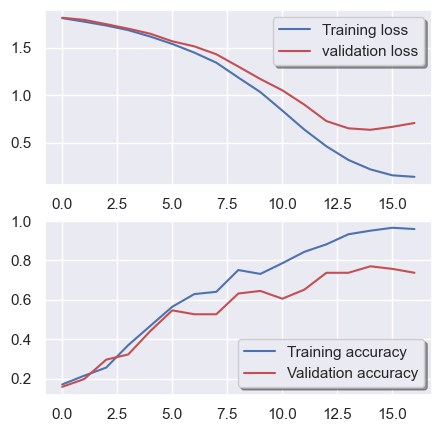

In [11]:
# To test the efficacy of the remembeerance metric, I need to overfit the model on X1, Y1

import tensorflow_addons as tfa
#---------------------------------------------------------------------------------


class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)



class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions



embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer
dropout_rate=0.4

input_shape=X1.shape[1:]
inputs = layers.Input(shape=input_shape)
embedding_layer = TokenAndPositionEmbedding(max_len, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D(name="getter")(x)
# x=layers.Flatten()(x)
# x = layers.Dropout(dropout_rate)(x)
# x = layers.Dense(30, activation="tanh")(x)
# x = layers.Dropout(dropout_rate)(x)
# x = layers.Dense(30, activation="tanh")(x)
# x = layers.Dropout(dropout_rate)(x)
outputs = layers.Dense(6, activation="softmax")(x)

target_model = keras.Model(inputs=inputs, outputs=outputs)


#---------------------------------------------------------------------------------
EPOCHS=epochy
LEARNING_RATE=1e-3
BATCH_SIZE=32
WEIGHT_DECAY=1e-4

class WarmUpCosine(keras.optimizers.schedules.LearningRateSchedule):
    def __init__(
        self, learning_rate_base, total_steps, warmup_learning_rate, warmup_steps
    ):
        super(WarmUpCosine, self).__init__()
        self.learning_rate_base = learning_rate_base
        self.total_steps = total_steps
        self.warmup_learning_rate = warmup_learning_rate
        self.warmup_steps = warmup_steps
        self.pi = tf.constant(np.pi)

    def __call__(self, step):
        if self.total_steps < self.warmup_steps:
            raise ValueError("Total_steps must be larger or equal to warmup_steps.")
        cos_annealed_lr = tf.cos(
            self.pi
            * (tf.cast(step, tf.float32) - self.warmup_steps)
            / float(self.total_steps - self.warmup_steps)
        )
        learning_rate = 0.5 * self.learning_rate_base * (1 + cos_annealed_lr)
        if self.warmup_steps > 0:
            if self.learning_rate_base < self.warmup_learning_rate:
                raise ValueError(
                    "Learning_rate_base must be larger or equal to "
                    "warmup_learning_rate."
                )
            slope = (
                self.learning_rate_base - self.warmup_learning_rate
            ) / self.warmup_steps
            warmup_rate = slope * tf.cast(step, tf.float32) + self.warmup_learning_rate
            learning_rate = tf.where(
                step < self.warmup_steps, warmup_rate, learning_rate
            )
        return tf.where(
            step > self.total_steps, 0.0, learning_rate, name="learning_rate"
        )


total_steps = int((len(X1) / BATCH_SIZE) * EPOCHS)
warmup_epoch_percentage = 0.15
warmup_steps = int(total_steps * warmup_epoch_percentage)
scheduled_lrs = WarmUpCosine(
    learning_rate_base=LEARNING_RATE,
    total_steps=total_steps,
    warmup_learning_rate=0.0,
    warmup_steps=warmup_steps,
)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
optim=tfa.optimizers.AdamW(learning_rate=scheduled_lrs, weight_decay=WEIGHT_DECAY)
# optim=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
target_model.compile(optimizer = optim,loss="categorical_crossentropy",metrics=['acc'])
target_model.summary()
history_target = target_model.fit(
    X1, Y1, batch_size=32, epochs=epochy,validation_split=0.2,verbose=0,callbacks=[callback]
)

#Plot the loss and accuracy curves for training and validation
plt.figure(figsize=(5,5))
fig, ax = plt.subplots(2,1)
#adjust figure size
fig.set_figheight(5)
fig.set_figwidth(5)
ax[0].plot(history_target.history['loss'], color='b', label="Training loss")
ax[0].plot(history_target.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_target.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history_target.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 40)]              0         
                                                                 
 token_and_position_embeddin  (None, 40, 32)           153888    
 g_3 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_3 (Transf  (None, 40, 32)           10656     
 ormerBlock)                                                     
                                                                 
 getter (GlobalAveragePoolin  (None, 32)               0         
 g1D)                                                            
                                                                 
 dense_12 (Dense)            (None, 100)               3300

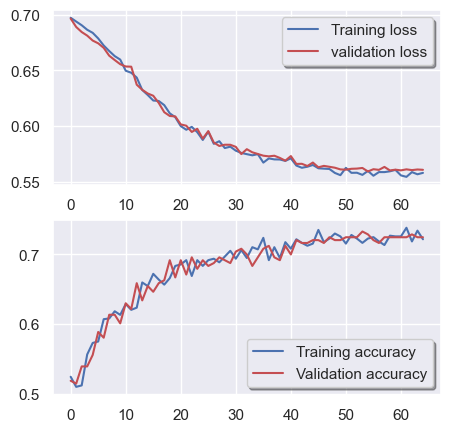

In [12]:
#First of all I need to take care that mollified model (rememberence) doesnot overfit---this would ensure that I am measuring rememberence correctly
#secondly, I test the mollified model on test set (after dividing in-out dataset into training and test)--train the mollified model on training set
# Mollified model is an example of emebedding model  like the BERT in NLP, where the target model learning the training set as an embedding, and 
# we would want to metricies this remeberence as the linear project of this embedding.
# The mollified model should necessarily have high accuracy (its IMP!), so the embeddings can be augmented with powerful networks to make my metricization hold.


see_X1=X1
see_X2=X2
bin_Y1=np.ones((len(see_X1),1))
bin_Y2=np.zeros((len(see_X2),1))
#vstack see_X3 and see_X4
see_X=np.vstack((see_X1,see_X2))
#vstack bin_Y3 and bin_Y4
bin2_Y=np.vstack((bin_Y1,bin_Y2))
#shuffle see_X and bin2_Y
see_X,bin2_Y=unison_shuffled_copies(see_X, bin2_Y)


#split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(see_X, bin2_Y, test_size=0.2, random_state=42)


# Mollified model (rememberence)
from keras.models import Model
target_model.trainable=False
layer_name = 'getter'
x = layers.Dense(100, activation="tanh")(target_model.get_layer(layer_name).output)
# x = layers.Dropout(0.1)(x)
# x = layers.Dense(50, activation="tanh")(x)
# x = layers.Dropout(0.1)(x)
o=layers.Dense(1, activation="sigmoid")(x)
mollified_target_model= Model(inputs=target_model.input, outputs=[o])

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
mollified_target_model.compile(optimizer = tfa.optimizers.AdamW(learning_rate=scheduled_lrs, weight_decay=WEIGHT_DECAY),loss="binary_crossentropy",metrics=['acc'])
mollified_target_model.summary()
history_target_mol = mollified_target_model.fit(
    X_train,y_train, batch_size=32, epochs=epochy,validation_split=0.2,verbose=0,callbacks=[callback]
)

#Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
#adjust figure size
fig.set_figheight(5)
fig.set_figwidth(5)
ax[0].plot(history_target_mol.history['loss'], color='b', label="Training loss")
ax[0].plot(history_target_mol.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history_target_mol.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history_target_mol.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)



In [14]:
y_pred_mollified=mollified_target_model.predict(X_test)
#binarize bin2_Y_pred_mollified
y_pred_mollified_star=np.copy(y_pred_mollified)
y_pred_mollified_star=np.where(y_pred_mollified_star>0.5,1,0)

#calculate the accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:",round(accuracy_score(y_test, y_pred_mollified_star),10))
#calculate the precision
from sklearn.metrics import precision_score
print("Precision:",precision_score(y_test, y_pred_mollified_star))
#calculate the recall
from sklearn.metrics import recall_score
print("Recall:",recall_score(y_test, y_pred_mollified_star))
#calculate the f1 score
from sklearn.metrics import f1_score
print("F1 score:",f1_score(y_test,y_pred_mollified_star))

10/10 [==============================] - 0s 4ms/step
Accuracy: 0.7203947368
Precision: 0.6973684210526315
Recall: 0.7310344827586207
F1 score: 0.7138047138047138
